In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [4]:
data_path = '/Users/qianyi/projects/huawei-competition/val.pt'
train_dataset = torch.load(data_path)

print(train_dataset)
train_dataset_sample = train_dataset["samples"][0:100]
train_dataset_labels = train_dataset["labels"][0:100]

{'samples': tensor([[[-3.5975e-01, -3.3411e-01, -2.8284e-01,  ..., -2.2301e-01,
           3.6669e-01,  3.0417e+00],
         [-2.9566e-01, -2.8711e-01, -2.6574e-01,  ..., -1.2870e+00,
          -1.1759e+00,  1.0931e+00],
         [ 6.7568e-02,  5.0475e-02,  2.0563e-02,  ..., -1.0606e+00,
          -1.5392e+00, -1.9451e+00],
         ...,
         [-5.5205e-01, -5.3923e-01, -5.1359e-01,  ..., -7.9990e-01,
           1.2739e-01,  2.8494e+00],
         [-2.2314e+00, -2.1545e+00, -2.0733e+00,  ..., -4.2385e-01,
          -2.5292e-01,  1.8239e+00],
         [ 4.3365e+00,  4.3579e+00,  4.4006e+00,  ...,  1.9179e+00,
           1.8880e+00,  3.2554e+00]],

        [[-9.3498e-03, -4.3536e-02, -6.9175e-02,  ..., -4.3424e+00,
          -4.2099e+00, -4.2142e+00],
         [-3.9394e-01, -4.2385e-01, -4.3240e-01,  ..., -4.5048e+00,
          -4.4407e+00, -4.3509e+00],
         [-3.8112e-01, -3.7685e-01, -3.5975e-01,  ..., -1.5891e-01,
          -2.2728e-01, -1.3755e-01],
         ...,
         [-2.

In [7]:
i = 0
X_train = train_dataset['samples'][i]
y_train = train_dataset['labels'][i]

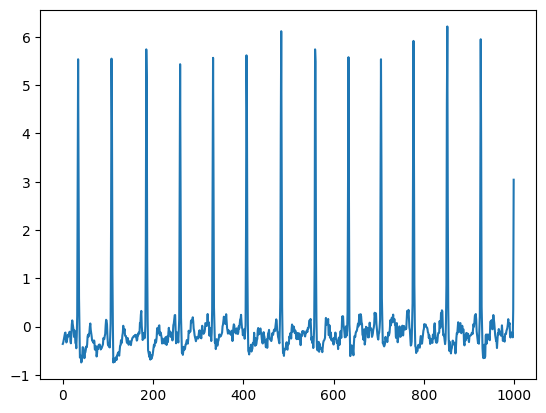

In [8]:
# data = np.load("sampleECG.npy")
plt.plot(X_train[0])

In [54]:
# save_directory = 'npy_files/'
# for i in range(100):
#     filename = f"{save_directory}row_{i+1}.npy"
#     np.save(filename, train_dataset_sample[i][0])

In [8]:
# test = np.load("/Users/von/Downloads/ecgdata/npy_files/row_0.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/von/Downloads/ecgdata/npy_files/row_0.npy'

In [10]:
label_test = train_dataset_labels[1]
print(label_test)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])


In [11]:
indices = np.where(label_test == 1)[0][0] + 1
print(indices)

38


In [9]:
lbl_top100 = [0 for i in range(100)]
for i in range(100):
    lbl_top100[i] = np.where(train_dataset_labels[i] == 1)[0][0] + 1

print(lbl_top100)

[38, 38, 14, 38, 14, 7, 38, 23, 36, 14, 38, 4, 38, 39, 37, 38, 38, 38, 4, 22, 37, 38, 14, 38, 38, 23, 38, 14, 7, 8, 38, 38, 31, 38, 5, 36, 38, 14, 22, 44, 38, 38, 38, 9, 38, 7, 37, 38, 38, 11, 38, 7, 31, 36, 29, 38, 38, 7, 38, 14, 38, 37, 38, 13, 38, 21, 1, 38, 14, 38, 38, 31, 38, 38, 14, 36, 38, 31, 38, 38, 8, 15, 38, 38, 38, 38, 38, 1, 38, 38, 10, 14, 4, 38, 16, 39, 38, 37, 38, 38]


In [10]:
i = 0
rsl = np.where(train_dataset_labels[i] == 1)[0][0] + 1
print(rsl)

38


In [11]:
host = "127.0.0.1"
port = 3306
db_name = "HUAWEI"
user_name = "root"
password = "26122000"

import pymysql
def create_connection():
    conn = pymysql.connect(host=host,
                           port=port,
                           db=db_name,
                           user=user_name,
                           password=password
                           )
    return conn

In [12]:


conn = create_connection()
for i in range(100):
    i += 1
    with conn.cursor() as cursor:
        file_name = "row_" + str(i) + ".npy"
        sql = "INSERT INTO Questions (file_name, correct_answer) VALUES (%s, %s)"
        cursor.execute(sql, [file_name, lbl_top100[i-1]])
        conn.commit()
conn.close()

In [16]:
# conn = create_connection()
# with conn.cursor() as cursor:
#     file_name = "row_" + str(1) + ".npy"
#     sql = "INSERT INTO Questions (file_name, correct_answer) VALUES (%s, %s)"
#     cursor.execute(sql, [file_name, lbl_top100[0]])
#     conn.commit()
# conn.close()
# print("success")

success
